**Automated Tooth Detection and FDI Numbering Using Deep Learning**

In [2]:
from ultralytics import YOLO
import torch

# Check GPU
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
CUDA available: True
Device: Tesla T4


In [14]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")

model.train(
    data="/content/ToothNumber_TaskDataset/data.yaml",
    epochs=200,
    imgsz=1024,
    batch=8
)



Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ToothNumber_TaskDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x796f8d6c5af0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,


image 1/50 /content/ToothNumber_TaskDataset/images/val/271041ce-20250421-112436631.jpg: 640x640 2 Canine (13)s, 1 Canine (23), 2 Canine (33)s, 1 Canine (43), 1 Central Incisor (21), 2 Central Incisor (11)s, 1 First Molar (16), 2 First Molar (26)s, 2 First Molar (36)s, 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 2 Lateral Incisor (12)s, 1 Second Molar (17), 2 Second Molar (27)s, 1 Second Molar (37), 2 Second Molar (47)s, 2 Second Premolar (15)s, 1 Second Premolar (25), 2 Second Premolar (35)s, 1 Third Molar (18), 2 Third Molar (28)s, 2 Third Molar (38)s, 2 Third Molar (48)s, 8.4ms
image 2/50 /content/ToothNumber_TaskDataset/images/val/2725830c-20240829-130426513.jpg: 640x640 2 Canine (13)s, 2 Canine (33)s, 1 Canine (43), 2 Central Incisor (21)s, 2 Central Incisor (41)s, 2 Central Incisor (11)s, 2 First Molar (16)s, 2 First Molar (26)s, 2 First Molar (36)s, 2 First Premol

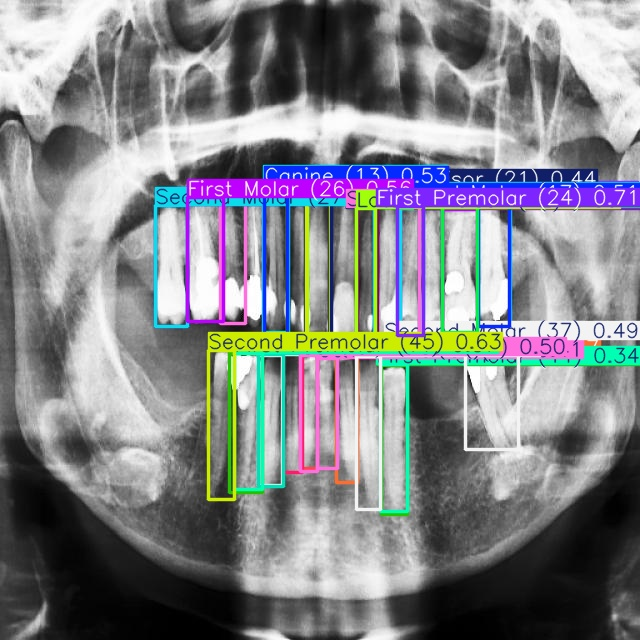

In [15]:
from ultralytics import YOLO
from IPython.display import Image, display
import glob

model = YOLO("runs/detect/train4/weights/best.pt")


results = model.predict(source="/content/ToothNumber_TaskDataset/images/val", save=True, conf=0.25)

predicted_images = glob.glob("runs/detect/predict/*.jpg")
display(Image(filename=predicted_images[0]))

In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train4/weights/best.pt")

metrics = model.val(data="/content/ToothNumber_TaskDataset/data.yaml", conf=0.25, iou=0.5)

Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2620.8±821.3 MB/s, size: 76.9 KB)
val: Scanning /content/ToothNumber_TaskDataset/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 62620.2it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.5it/s 2.7s


In [20]:
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)


mAP50: 0.7861594313425053
mAP50-95: 0.6329035212162429
Precision: 0.857936689586026
Recall: 0.888610916351374


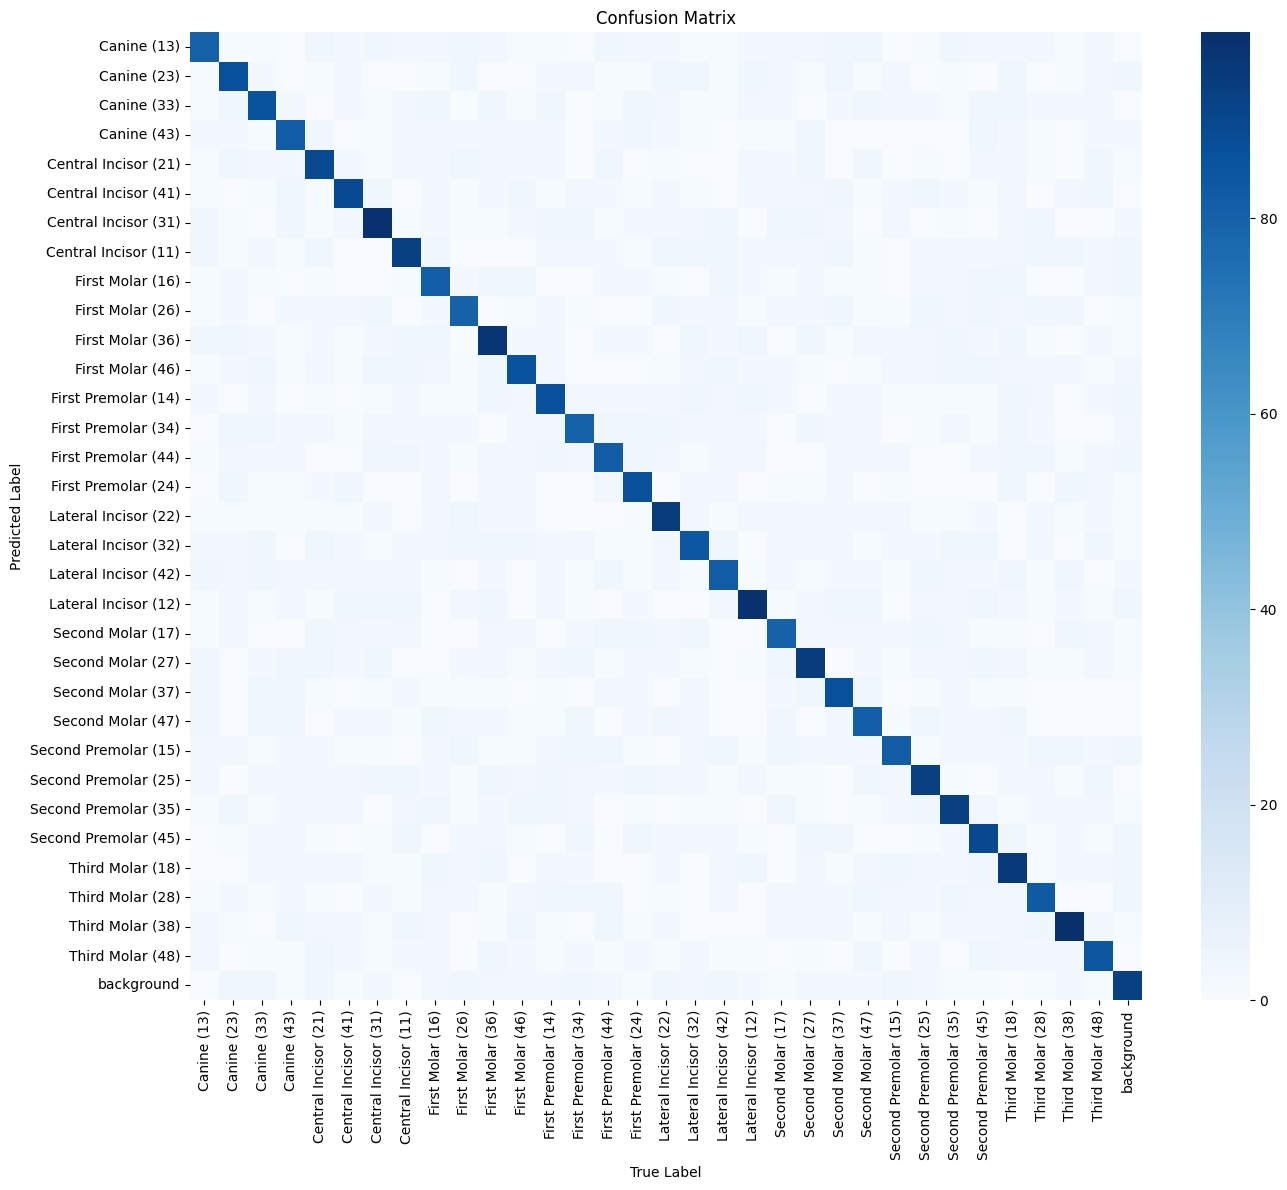

In [42]:
display(Image(filename="runs/detect/train4/confusion_matrix.png"))


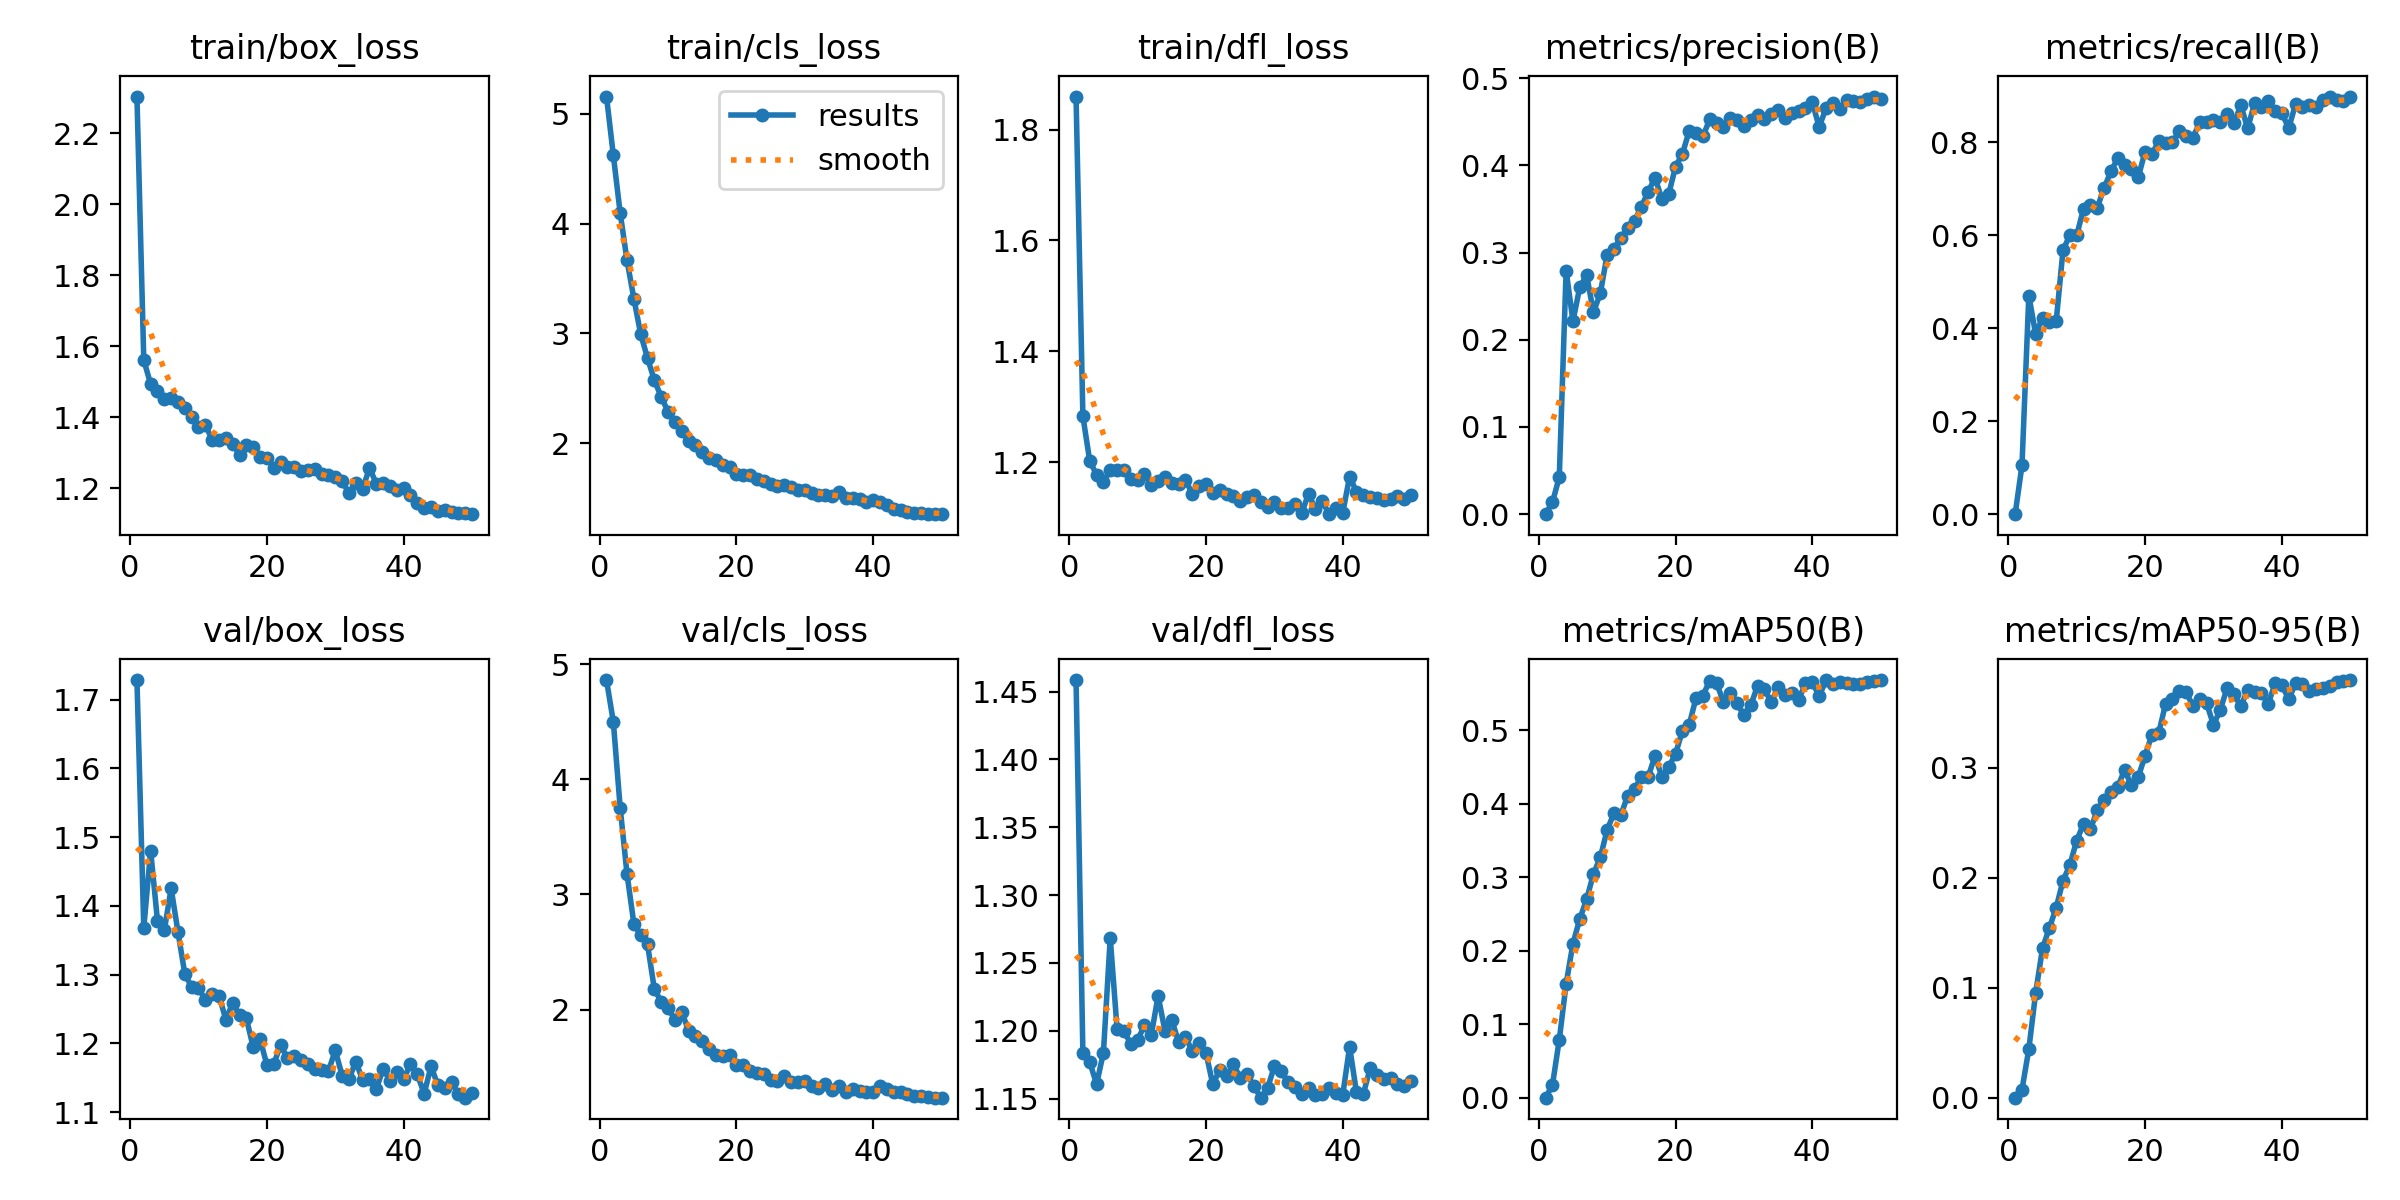

In [39]:
display(Image(filename="runs/detect/train4/results.png"))


image 1/50 /content/ToothNumber_TaskDataset/images/val/271041ce-20250421-112436631.jpg: 640x640 2 Canine (13)s, 1 Canine (23), 2 Canine (33)s, 1 Canine (43), 1 Central Incisor (21), 2 Central Incisor (11)s, 1 First Molar (16), 2 First Molar (26)s, 2 First Molar (36)s, 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 2 Lateral Incisor (12)s, 1 Second Molar (17), 2 Second Molar (27)s, 1 Second Molar (37), 2 Second Molar (47)s, 2 Second Premolar (15)s, 1 Second Premolar (25), 2 Second Premolar (35)s, 1 Third Molar (18), 2 Third Molar (28)s, 2 Third Molar (38)s, 2 Third Molar (48)s, 7.2ms
image 2/50 /content/ToothNumber_TaskDataset/images/val/2725830c-20240829-130426513.jpg: 640x640 2 Canine (13)s, 2 Canine (33)s, 1 Canine (43), 2 Central Incisor (21)s, 2 Central Incisor (41)s, 2 Central Incisor (11)s, 2 First Molar (16)s, 2 First Molar (26)s, 2 First Molar (36)s, 2 First Premol

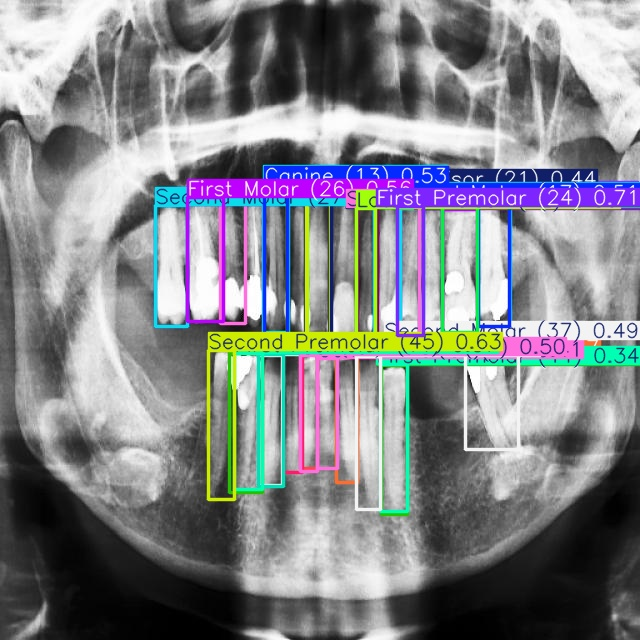

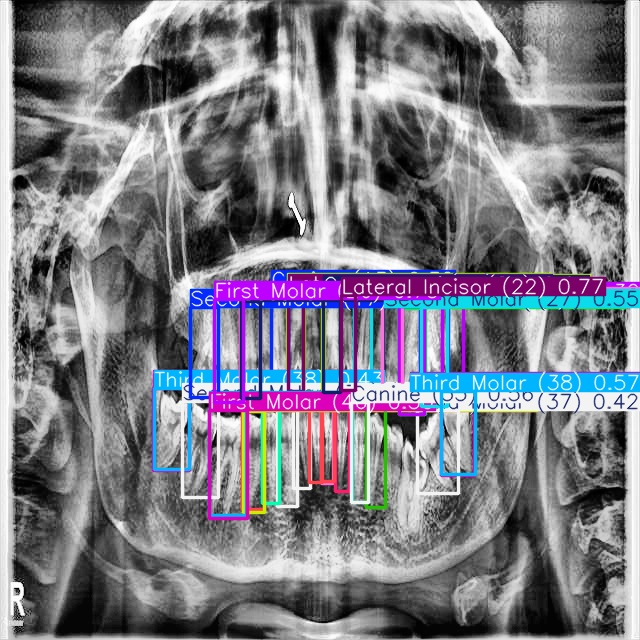

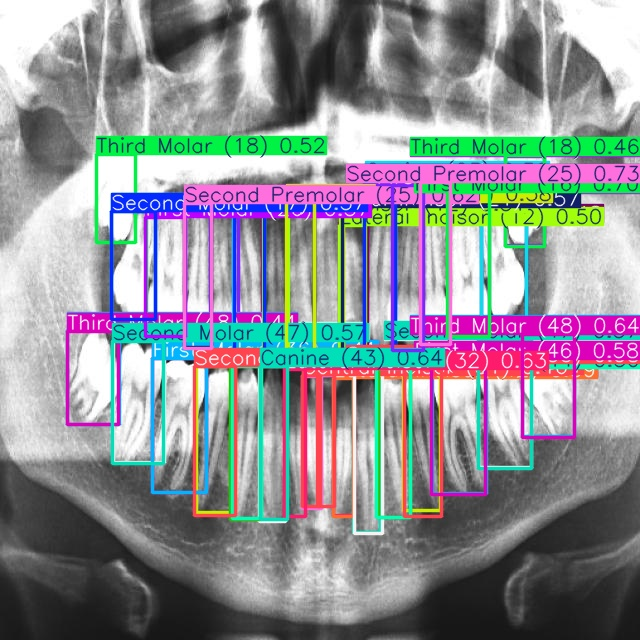

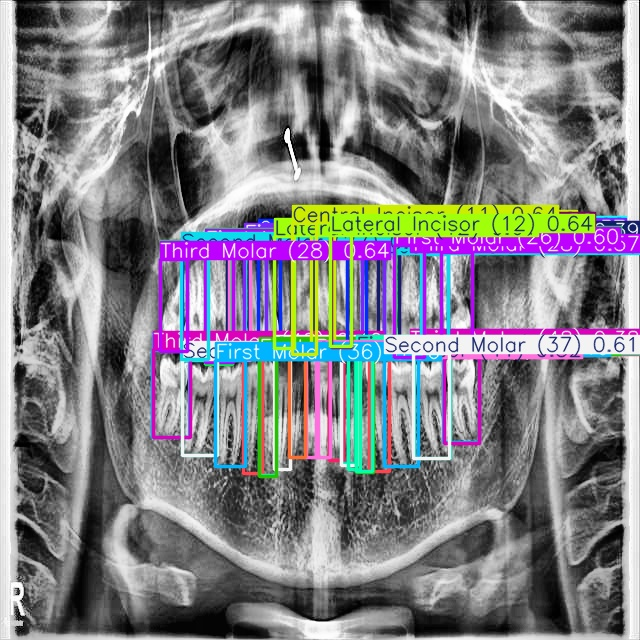

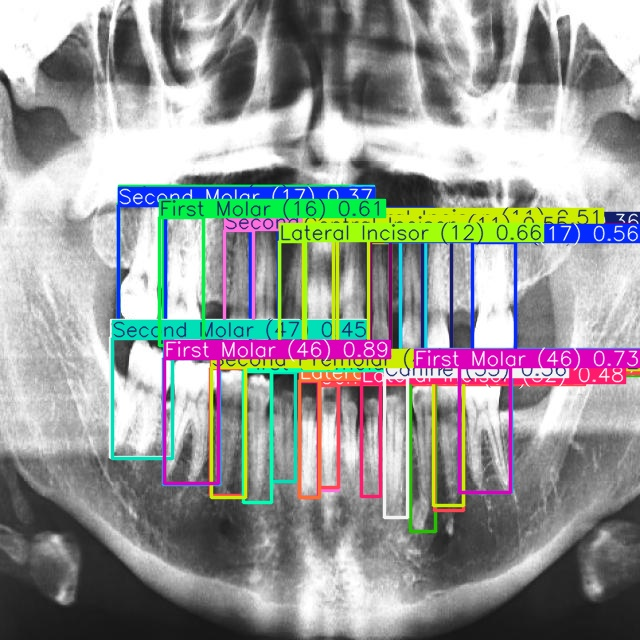

In [26]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display

model = YOLO("runs/detect/train4/weights/best.pt")

results = model.predict(source="/content/ToothNumber_TaskDataset/images/val", save=True, conf=0.25)

predicted_images = glob.glob("runs/detect/predict/*.jpg")

for img_path in predicted_images[:5]:  # show first 5 images
    display(Image(filename=img_path))

In [29]:
results = model.predict(source="/content/ToothNumber_TaskDataset/images/val", save=True, conf=0.25)



image 1/50 /content/ToothNumber_TaskDataset/images/val/271041ce-20250421-112436631.jpg: 640x640 2 Canine (13)s, 1 Canine (23), 2 Canine (33)s, 1 Canine (43), 1 Central Incisor (21), 2 Central Incisor (11)s, 1 First Molar (16), 2 First Molar (26)s, 2 First Molar (36)s, 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 2 Lateral Incisor (12)s, 1 Second Molar (17), 2 Second Molar (27)s, 1 Second Molar (37), 2 Second Molar (47)s, 2 Second Premolar (15)s, 1 Second Premolar (25), 2 Second Premolar (35)s, 1 Third Molar (18), 2 Third Molar (28)s, 2 Third Molar (38)s, 2 Third Molar (48)s, 9.1ms
image 2/50 /content/ToothNumber_TaskDataset/images/val/2725830c-20240829-130426513.jpg: 640x640 2 Canine (13)s, 2 Canine (33)s, 1 Canine (43), 2 Central Incisor (21)s, 2 Central Incisor (41)s, 2 Central Incisor (11)s, 2 First Molar (16)s, 2 First Molar (26)s, 2 First Molar (36)s, 2 First Premol

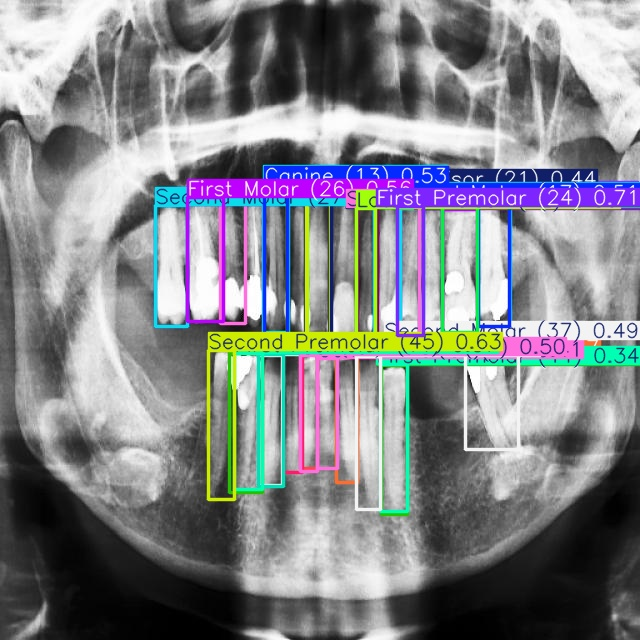

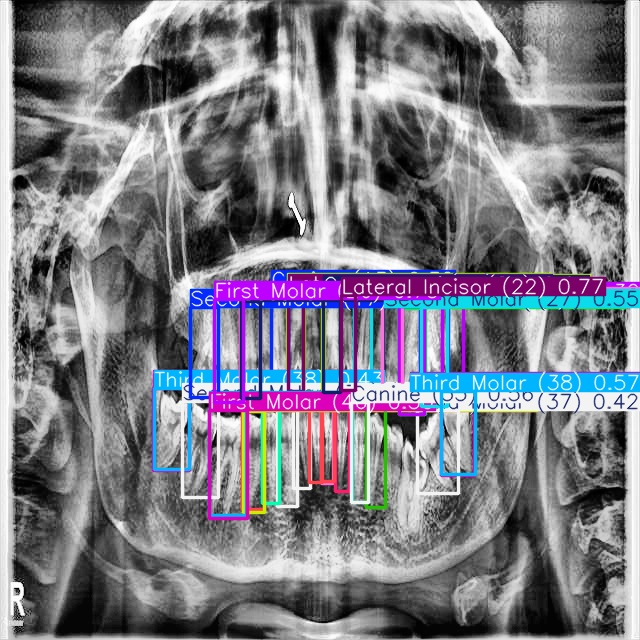

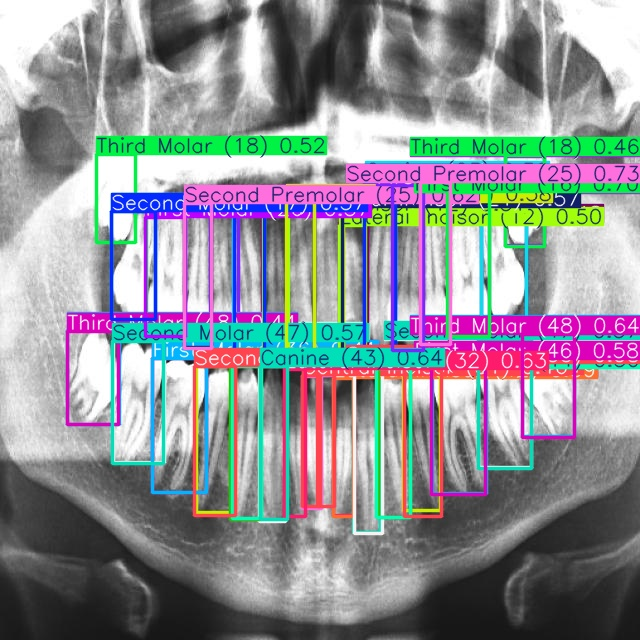

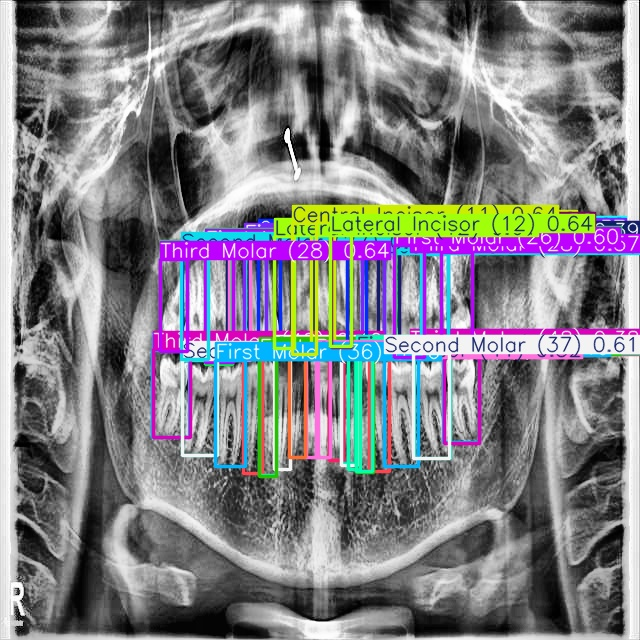

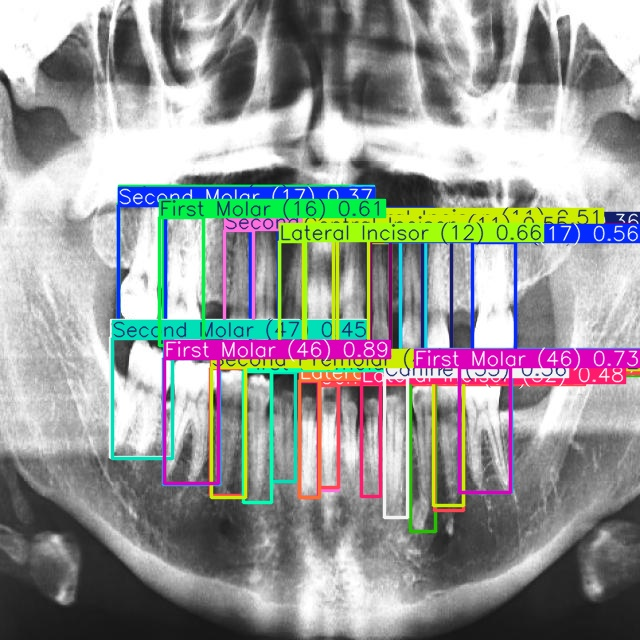

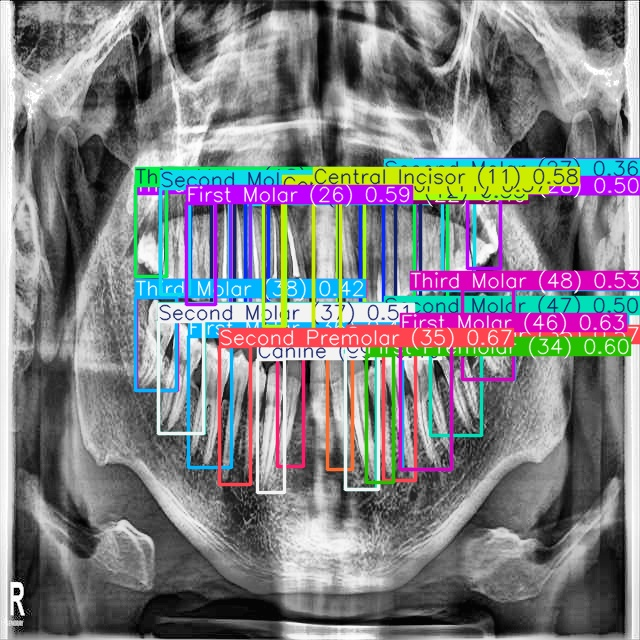

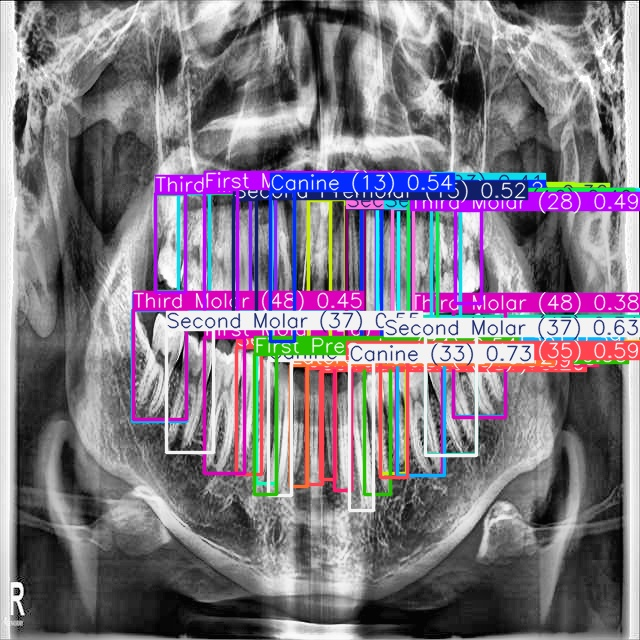

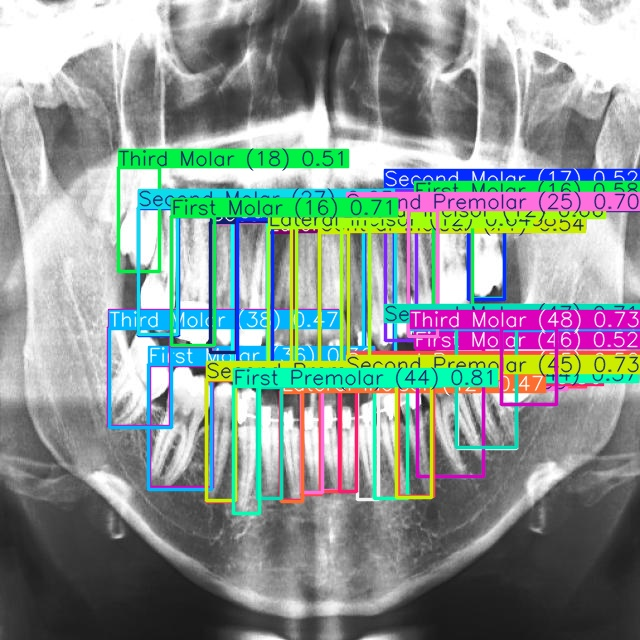

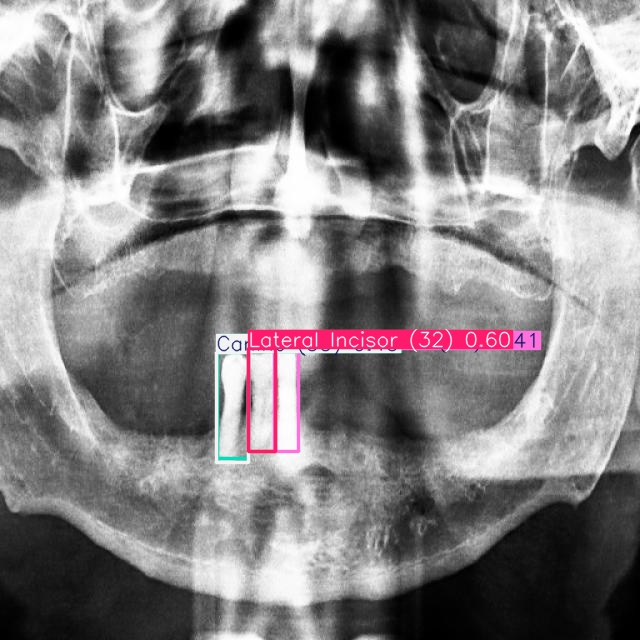

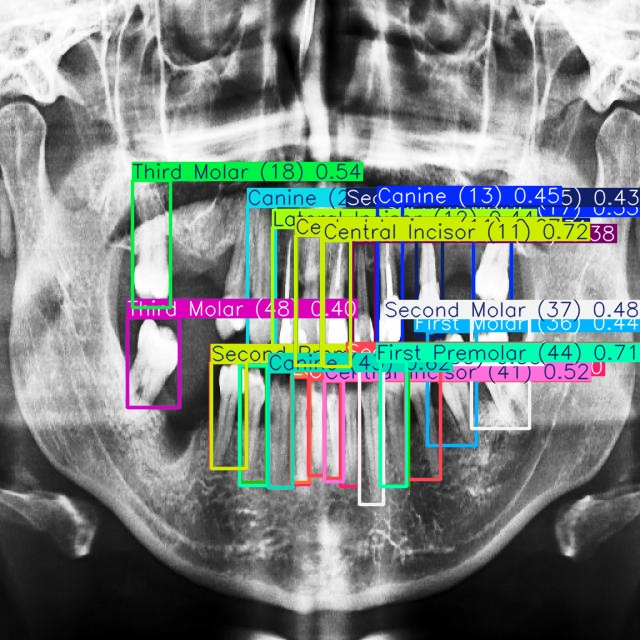

In [32]:
for img_path in predicted_images[:10]:
    display(Image(filename=img_path))


**Conclusion**

In this project, I focused on developing an automated system for tooth detection and numbering using deep learning. I trained a YOLO model on dental images and evaluated its performance. The results showed a precision of 0.8579, recall of 0.8886, mAP@50 of 0.7861, and mAP@50-95 of 0.6329. These scores indicate that the model is performing well in detecting most of the teeth accurately.

Due to hardware limitations (GPU disconnection), I was not able to complete the post-processing stage, which is necessary for assigning anatomical structure–based numbering (such as separating upper vs lower arch, dividing quadrants, and applying FDI numbering). However, the current stage already demonstrates that the detection model is functioning properly and can be extended further.

This project proves that deep learning can be applied successfully for dental image analysis and lays a strong foundation for the next steps, which would include implementing post-processing logic, refining detection results, and testing on larger datasets for improved accuracy.